# An Experimental Study on Breast Ultrasound Tumor Classification



In this Notebook we explore the CNN based classification of Breast US Tumor Images. The main idea is to study the efficiency of benign vs. malignant classification of the images with the help of pretrained Deep CNN models. Particularly for this notebook, the Ground Truth Tumor Masks are not going to be utilized for the purpose of classification.

For the purpose experimentation two publicly available datasets are utilized, 

*   BUSI dataset. (https://www.sciencedirect.com/science/article/pii/S2352340919312181)
*   UDIAT dataset. (https://ieeexplore.ieee.org/abstract/document/8003418)



The dataset images have been preprocessed and converted to 224x224 dimensionality and saved as .npy files. These files will be used directly in this Notebook.

In [1]:
# Connect to Google Drive to access dataset
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Check dataset filenames
import os

bus_filenames = os.listdir('/content/gdrive/My Drive/BreastUSDatasetNPYs')
print(bus_filenames)

['busiTestImages.npy', 'busiTestLabels.npy', 'busiTestMasks.npy', 'busiTrainImages.npy', 'udTrainImages.npy', 'busiTrainMasks.npy', 'udTestLabels.npy', 'udTestMasks.npy', 'udTestImages.npy', 'busiTrainLabels.npy', 'udTrainLabels.npy', 'udTrainMasks.npy']


In [3]:
# Read the Numpy files containing the dataset.
import numpy as np

busiTrainImages = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTrainImages.npy')
busiTrainMasks = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTrainMasks.npy')
busiTrainLabels = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTrainLabels.npy')
busiTestImages = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTestImages.npy')
busiTestMasks = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTestMasks.npy')
busiTestLabels = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTestLabels.npy')

udTrainImages = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTrainImages.npy')
udTrainMasks = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTrainMasks.npy')
udTrainLabels = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTrainLabels.npy')
udTestImages = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTestImages.npy')
udTestMasks = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTestMasks.npy')
udTestLabels = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTestLabels.npy')

print(busiTrainImages.shape)
print(busiTrainMasks.shape)
print(busiTrainLabels.shape)
print(busiTestImages.shape)
print(busiTestMasks.shape)
print(busiTestLabels.shape)

print(udTrainImages.shape)
print(udTrainMasks.shape)
print(udTrainLabels.shape)
print(udTestImages.shape)
print(udTestMasks.shape)
print(udTestLabels.shape)

(532, 224, 224)
(532, 224, 224)
(532,)
(133, 224, 224)
(133, 224, 224)
(133,)
(130, 224, 224)
(130, 224, 224)
(130,)
(33, 224, 224)
(33, 224, 224)
(33,)


In [4]:
# Inspect the pixel value range 

print(busiTrainImages[0])
print(busiTrainMasks[0])
print(busiTrainLabels[0])

# The images and also the masks are having pixel values in the range 0-255
# We need to rescale the data to bring all pixel values to the range 0 to 1

busiTrainImages = busiTrainImages/255.
busiTrainMasks = busiTrainMasks/255.

busiTestImages = busiTestImages/255.
busiTestMasks = busiTestMasks/255.

udTrainImages = udTrainImages/255.
udTrainMasks = udTrainMasks/255.

udTestImages = udTestImages/255.
udTestMasks = udTestMasks/255.

[[ 80 174  37 ... 208 207 199]
 [ 83 207  21 ... 195 199 202]
 [ 85 161  42 ... 180 182 186]
 ...
 [ 20  19  16 ...  36  46  54]
 [ 29  27  23 ...  57  53  46]
 [ 20  20  23 ...  37  32  30]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0


In [5]:
# After rescaling the pixel values are modified
print(busiTrainImages[0])

[[0.31372549 0.68235294 0.14509804 ... 0.81568627 0.81176471 0.78039216]
 [0.3254902  0.81176471 0.08235294 ... 0.76470588 0.78039216 0.79215686]
 [0.33333333 0.63137255 0.16470588 ... 0.70588235 0.71372549 0.72941176]
 ...
 [0.07843137 0.0745098  0.0627451  ... 0.14117647 0.18039216 0.21176471]
 [0.11372549 0.10588235 0.09019608 ... 0.22352941 0.20784314 0.18039216]
 [0.07843137 0.07843137 0.09019608 ... 0.14509804 0.1254902  0.11764706]]


Visualization of BUS samples

The following are some benign BUS samples...


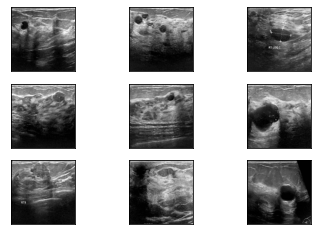

In [6]:
import matplotlib.pyplot as plt

sampleBenignInd = list()
sampleMaligInd = list()
for i in range(len(busiTrainLabels)):
  if busiTrainLabels[i] == 0 and len(sampleBenignInd) < 10:
    sampleBenignInd.append(i)
  elif busiTrainLabels[i] == 1 and len(sampleMaligInd) < 10:
    sampleMaligInd.append(i)
  if len(sampleBenignInd) == 9 and len(sampleMaligInd) == 9:
    break

print('The following are some benign BUS samples...')
fig, axs = plt.subplots(3, 3)
axs[0, 0].imshow(busiTrainImages[sampleBenignInd[0]], cmap='gray')

axs[0, 1].imshow(busiTrainImages[sampleBenignInd[1]], cmap='gray')

axs[0, 2].imshow(busiTrainImages[sampleBenignInd[2]], cmap='gray')

axs[1, 0].imshow(busiTrainImages[sampleBenignInd[3]], cmap='gray')

axs[1, 1].imshow(busiTrainImages[sampleBenignInd[4]], cmap='gray')

axs[1, 2].imshow(busiTrainImages[sampleBenignInd[5]], cmap='gray')

axs[2, 0].imshow(busiTrainImages[sampleBenignInd[6]], cmap='gray')

axs[2, 1].imshow(busiTrainImages[sampleBenignInd[7]], cmap='gray')

axs[2, 2].imshow(busiTrainImages[sampleBenignInd[8]], cmap='gray')



# remove the x and y ticks
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

The following are some malignant BUS samples...


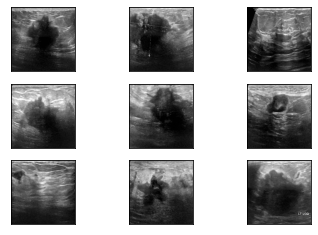

In [7]:
print('The following are some malignant BUS samples...')

fig, axs = plt.subplots(3, 3)
axs[0, 0].imshow(busiTrainImages[sampleMaligInd[0]], cmap='gray')

axs[0, 1].imshow(busiTrainImages[sampleMaligInd[1]], cmap='gray')

axs[0, 2].imshow(busiTrainImages[sampleMaligInd[2]], cmap='gray')

axs[1, 0].imshow(busiTrainImages[sampleMaligInd[3]], cmap='gray')

axs[1, 1].imshow(busiTrainImages[sampleMaligInd[4]], cmap='gray')

axs[1, 2].imshow(busiTrainImages[sampleMaligInd[5]], cmap='gray')

axs[2, 0].imshow(busiTrainImages[sampleMaligInd[6]], cmap='gray')

axs[2, 1].imshow(busiTrainImages[sampleMaligInd[7]], cmap='gray')

axs[2, 2].imshow(busiTrainImages[sampleMaligInd[8]], cmap='gray')



# remove the x and y ticks
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [8]:
# Inspect the class label distribution
# The dataset has already been split into 75-25 train-test ratio.
# However, we would need to further split the training set into train and validation sets so that we can fine tune our CNN models effectively

print('Number of malignant BUS samples in BUSI train dataset: ',sum(busiTrainLabels))
print('Number of benign BUS samples in BUSI train dataset: ',len(busiTrainLabels)-sum(busiTrainLabels))

print('Number of malignant BUS samples in BUSI test dataset: ',sum(busiTestLabels))
print('Number of benign BUS samples in BUSI test dataset: ',len(busiTestLabels)-sum(busiTestLabels))

print('Number of malignant BUS samples in UDIAT train dataset: ',sum(udTrainLabels))
print('Number of benign BUS samples in UDIAT train dataset: ',len(udTrainLabels)-sum(udTrainLabels))

print('Number of malignant BUS samples in UDIAT test dataset: ',sum(udTestLabels))
print('Number of benign BUS samples in UDIAT test dataset: ',len(udTestLabels)-sum(udTestLabels))

Number of malignant BUS samples in BUSI train dataset:  169
Number of benign BUS samples in BUSI train dataset:  363
Number of malignant BUS samples in BUSI test dataset:  42
Number of benign BUS samples in BUSI test dataset:  91
Number of malignant BUS samples in UDIAT train dataset:  43
Number of benign BUS samples in UDIAT train dataset:  87
Number of malignant BUS samples in UDIAT test dataset:  11
Number of benign BUS samples in UDIAT test dataset:  22


In [9]:
# Split the training set in to train-validation splits.

from sklearn.model_selection import train_test_split

xTrainBUSI, xTestBUSI, yTrainBUSI, yTestBUSI = train_test_split(busiTrainImages, busiTrainLabels, test_size=0.2, random_state=42, stratify=busiTrainLabels)
xTrainUD, xTestUD, yTrainUD, yTestUD = train_test_split(udTrainImages, udTrainLabels, test_size=0.2, random_state=42, stratify=udTrainLabels)

print(xTrainBUSI.shape)
print(yTrainBUSI.shape)
print(xTestBUSI.shape)
print(yTestBUSI.shape)

print(xTrainUD.shape)
print(yTrainUD.shape)
print(xTestUD.shape)
print(yTestUD.shape)

(425, 224, 224)
(425,)
(107, 224, 224)
(107,)
(104, 224, 224)
(104,)
(26, 224, 224)
(26,)


In [10]:
xTrainBUSI = xTrainBUSI.reshape((-1, 224, 224, 1))
xTestBUSI = xTestBUSI.reshape((-1, 224, 224, 1))
busiTestImages = busiTestImages.reshape((-1, 224, 224, 1))

xTrainUD = xTrainUD.reshape((-1, 224, 224, 1))
xTestUD = xTestUD.reshape((-1, 224, 224, 1))
udTestImages = udTestImages.reshape((-1, 224, 224, 1))

print(xTrainBUSI.shape)
print(yTrainBUSI.shape)
print(xTestBUSI.shape)
print(yTestBUSI.shape)
print(busiTestImages.shape)
print(busiTestLabels.shape)

print(xTrainUD.shape)
print(yTrainUD.shape)
print(xTestUD.shape)
print(yTestUD.shape)
print(udTestImages.shape)
print(udTestLabels.shape)

(425, 224, 224, 1)
(425,)
(107, 224, 224, 1)
(107,)
(133, 224, 224, 1)
(133,)
(104, 224, 224, 1)
(104,)
(26, 224, 224, 1)
(26,)
(33, 224, 224, 1)
(33,)


### Once our data is ready, next we prepare our CNN model for training.

In [11]:
# ResNet50 Model
import tensorflow
from tensorflow.keras import layers

IMG_HEIGHT=224
IMG_WIDTH = 224
IMG_CHANNELS = 1
inputs = layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))


import tensorflow as tf
# from tf.keras.applications.resnet50 import ResNet50
# load model
model = tf.keras.applications.resnet50.ResNet50(include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=(224,224,1))

x = model(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)
binary_output = layers.Dense(1, activation='sigmoid', name='binary_output')(x)


res50model = tf.keras.Model(inputs = inputs, outputs = binary_output)
print(res50model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23581440  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 binary_output (Dense)       (None, 1)                 33        
                                                             

In [12]:
# Compile model

res50model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 1/500
27/27 [==============================] - 24s 276ms/step - loss: 0.8620 - accuracy: 0.6729 - val_loss: 0.7047 - val_accuracy: 0.3178
Epoch 2/500
27/27 [==============================] - 5s 178ms/step - loss: 0.5815 - accuracy: 0.6800 - val_loss: 0.6965 - val_accuracy: 0.3178
Epoch 3/500
27/27 [==============================] - 5s 174ms/step - loss: 0.5008 - accuracy: 0.6824 - val_loss: 0.7171 - val_accuracy: 0.3178
Epoch 4/500
27/27 [==============================] - 5s 174ms/step - loss: 0.4414 - accuracy: 0.7882 - val_loss: 0.7290 - val_accuracy: 0.3178
Epoch 5/500
27/27 [==============================] - 5s 175ms/step - loss: 0.4211 - accuracy: 0.8000 - val_loss: 0.8950 - val_accuracy: 0.3178
Epoch 6/500
27/27 [==============================] - 5s 175ms/step - loss: 0.4167 - accuracy: 0.8071 - val_loss: 1.3397 - val_accuracy: 0.3178
Epoch 7/500
27/27 [==============================] - 5s 175ms/step - loss: 0.4055 - accuracy: 0.7835 - val_loss: 0.8434 - val_accuracy: 0.317

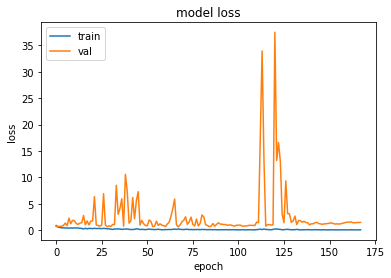

In [13]:
# Model training with earlystopping
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=100, verbose=1, mode='min',restore_best_weights=True)

history = res50model.fit(xTrainBUSI, yTrainBUSI,
              epochs=500,
              verbose=1,
              validation_data = (xTestBUSI, yTestBUSI), batch_size=16,
              callbacks = [es]
             )

# Plot the training and validation losses

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
preds = res50model.predict(busiTestImages).ravel()
print(preds.shape)

(133,)


In [15]:
# Evaluate model performance on several key metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics

binPreds = list()

for i in range(len(preds)):
  if preds[i]>0.5:
    binPreds.append(1)
  else:
    binPreds.append(0)
cm = confusion_matrix(binPreds, busiTestLabels)
print(cm)

TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

sens = TP / (TP + FN)
spec = TN / (TN + FP)
prec = TP / (TP + FP)
rec = TP / (TP + FN)
f1 = (2*prec*rec)/(prec+rec)
acc = (TP + TN) / (TP + FP + TN + FN)

print('ResNet50 performance')
print('Accuracy: ', acc)
print('Sensitivity: ', sens)
print('Specificity: ', spec)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1 Score: ', f1)

fpr, tpr, thresholds = metrics.roc_curve(busiTestLabels, preds, pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))

[[76 17]
 [15 25]]
ResNet50 performance
Accuracy:  0.7593984962406015
Sensitivity:  0.8351648351648352
Specificity:  0.5952380952380952
Precision:  0.8172043010752689
Recall:  0.8351648351648352
F1 Score:  0.8260869565217392
AUC:  0.8500784929356359


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 densenet121 (Functional)    (None, 7, 7, 1024)        7031232   
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 32)                32800     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 binary_output (Dense)       (None, 1)                 33        
                                                           

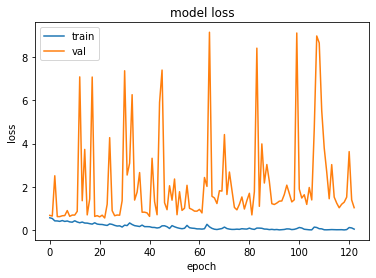

[[70 12]
 [21 30]]
DenseNet121 Classification performance.
Accuracy:  0.7518796992481203
Sensitivity:  0.7692307692307693
Specificity:  0.7142857142857143
Precision:  0.8536585365853658
Recall:  0.7692307692307693
F1 Score:  0.8092485549132947
AUC:  0.8330716902145474


In [16]:
# DenseNet121 based classification

model = tf.keras.applications.DenseNet121(include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=(224,224,1))

x = model(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)
binary_output = layers.Dense(1, activation='sigmoid', name='binary_output')(x)


dense121model = tf.keras.Model(inputs = inputs, outputs = binary_output)
print(dense121model.summary())

# Compile model

dense121model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Model training with earlystopping

history = dense121model.fit(xTrainBUSI, yTrainBUSI,
              epochs=500,
              verbose=1,
              validation_data = (xTestBUSI, yTestBUSI), batch_size=16,
              callbacks = [es]
             )

# Plot the training and validation losses

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

preds = dense121model.predict(busiTestImages).ravel()

binPreds = list()

for i in range(len(preds)):
  if preds[i]>0.5:
    binPreds.append(1)
  else:
    binPreds.append(0)
cm = confusion_matrix(binPreds, busiTestLabels)
print(cm)

TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

sens = TP / (TP + FN)
spec = TN / (TN + FP)
prec = TP / (TP + FP)
rec = TP / (TP + FN)
f1 = (2*prec*rec)/(prec+rec)
acc = (TP + TN) / (TP + FP + TN + FN)

print('DenseNet121 Classification performance.')
print('Accuracy: ', acc)
print('Sensitivity: ', sens)
print('Specificity: ', spec)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1 Score: ', f1)

fpr, tpr, thresholds = metrics.roc_curve(busiTestLabels, preds, pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802208  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 32)                65568     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 binary_output (Dense)       (None, 1)                 33        
                                                           

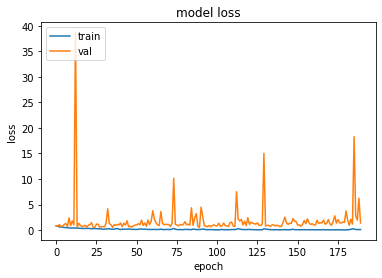

[[83 15]
 [ 8 27]]
InceptionV3 Model Classification performance.
Accuracy:  0.8270676691729323
Sensitivity:  0.9120879120879121
Specificity:  0.6428571428571429
Precision:  0.8469387755102041
Recall:  0.9120879120879121
F1 Score:  0.8783068783068784
AUC:  0.849293563579278


In [17]:
# InceptionV3 based classification

model = tf.keras.applications.inception_v3.InceptionV3(include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=(224,224,1))

x = model(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)
binary_output = layers.Dense(1, activation='sigmoid', name='binary_output')(x)


incv3model = tf.keras.Model(inputs = inputs, outputs = binary_output)
print(incv3model.summary())

# Compile model

incv3model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Model training with earlystopping

history = incv3model.fit(xTrainBUSI, yTrainBUSI,
              epochs=500,
              verbose=1,
              validation_data = (xTestBUSI, yTestBUSI), batch_size=16,
              callbacks = [es]
             )

# Plot the training and validation losses

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

preds = incv3model.predict(busiTestImages).ravel()

binPreds = list()

for i in range(len(preds)):
  if preds[i]>0.5:
    binPreds.append(1)
  else:
    binPreds.append(0)
cm = confusion_matrix(binPreds, busiTestLabels)
print(cm)

TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

sens = TP / (TP + FN)
spec = TN / (TN + FP)
prec = TP / (TP + FP)
rec = TP / (TP + FN)
f1 = (2*prec*rec)/(prec+rec)
acc = (TP + TN) / (TP + FP + TN + FN)

print('InceptionV3 Model Classification performance.')
print('Accuracy: ', acc)
print('Sensitivity: ', sens)
print('Specificity: ', spec)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1 Score: ', f1)

fpr, tpr, thresholds = metrics.roc_curve(busiTestLabels, preds, pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))

###The individual model prediction results so far are:

ResNet50
1. Accuracy:  0.7593984962406015
2. Sensitivity:  0.8351648351648352
3. Specificity:  0.5952380952380952
4. Precision:  0.8172043010752689
5. Recall:  0.8351648351648352
6. F1 Score:  0.8260869565217392
7. AUC:  0.8500784929356359

InceptionV3
1. Accuracy:  0.8270676691729323
2. Sensitivity:  0.9120879120879121
3. Specificity:  0.6428571428571429
4. Precision:  0.8469387755102041
5. Recall:  0.9120879120879121
6. F1 Score:  0.8783068783068784
7. AUC:  0.849293563579278

DenseNet121
1. Accuracy:  0.7518796992481203
2. Sensitivity:  0.7692307692307693
3. Specificity:  0.7142857142857143
4. Precision:  0.8536585365853658
5. Recall:  0.7692307692307693
6. F1 Score:  0.8092485549132947
7. AUC:  0.8330716902145474

### Next we try to check whether decision level ensembling of these individual models can do any better or not.

In [21]:
# Get individual model predictions
pred1 = res50model.predict(busiTestImages).ravel()
pred2 = incv3model.predict(busiTestImages).ravel()
pred3 = dense121model.predict(busiTestImages).ravel()

# Get probability averaging based ensembling predictions
preds = np.mean([pred1,pred2,pred3],axis=0)

# Calculate evaluation metrics for ensembled predictions
binPreds = list()

for i in range(len(preds)):
  if preds[i]>0.5:
    binPreds.append(1)
  else:
    binPreds.append(0)
cm = confusion_matrix(binPreds, busiTestLabels)
print(cm)

TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

sens = TP / (TP + FN)
spec = TN / (TN + FP)
prec = TP / (TP + FP)
rec = TP / (TP + FN)
f1 = (2*prec*rec)/(prec+rec)
acc = (TP + TN) / (TP + FP + TN + FN)

print('Ensembled Model Classification performance.')
print('Accuracy: ', acc)
print('Sensitivity: ', sens)
print('Specificity: ', spec)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1 Score: ', f1)

fpr, tpr, thresholds = metrics.roc_curve(busiTestLabels, preds, pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))

[[83 12]
 [ 8 30]]
Ensembled Model Classification performance.
Accuracy:  0.849624060150376
Sensitivity:  0.9120879120879121
Specificity:  0.7142857142857143
Precision:  0.8736842105263158
Recall:  0.9120879120879121
F1 Score:  0.8924731182795699
AUC:  0.8785975928833071


We observe that after ensembling, the prediction quality improves significantly. 

The AUC value improves from ~0.85 to ~0.88

The F1-Score improves from ~0.87.8 to ~0.89

The Accuracy improves from ~82.7% to ~85%

The prediction sensitivity stays same as the previous best at 0.912

The prediction specificity stays same as the previous best at 0.714

The precision of prediction also improves from ~0.8536 to ~0.8736